# 5_金融数据获取、清洗、整理和存储

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings; warnings.simplefilter('ignore') #忽略可能会出现的警告信息，警告并不是错误，可以忽略；

## 1. 从不同数据来源获取——本地

### 1.1 常用：本地文件读取

In [ ]:
with open('data/000001.csv', 'r') as f:      #推荐这种方法；
    for i in range(5):
        print(f.readline())

In [ ]:
f = open('data/000001.csv', 'r')
for i in range(5):
    print(f.readline())
f.close()

In [ ]:
with open('data/000001.csv', 'r') as f:            #未打印，不然会输出大量无用信息；
    print(f.read())

### 1.2 Python CSV模块读取

In [ ]:
import csv

In [ ]:
csv_reader = csv.reader(open('data/000001.csv', 'r'))

In [ ]:
csv_reader

In [ ]:
data = [i for i in csv_reader]               #从csv_reader中读取出数据，将其解析成list；

In [ ]:
type(data)

In [ ]:
data[:5]

### 1.3 常用：Pandas读取CSV

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('data/000001.csv')

In [ ]:
data = pd.read_csv('data/000001.csv', index_col=1,
                   parse_dates=True)                #解析日期

In [ ]:
data.info()

In [ ]:
data.head()

In [ ]:
del data['Unnamed: 0']

In [ ]:
data.head()

In [ ]:
data.to_csv('000001.csv')

In [ ]:
data.to_excel('000001.xlsx')

In [ ]:
data.to_json('000001.json')

## 2. 从网络Open Source读取

### 2.1 Yahoo

In [2]:
from pandas_datareader import data as web
import fix_yahoo_finance as yf
yf.pdr_override()

ModuleNotFoundError: No module named 'fix_yahoo_finance'

In [ ]:
#不翻墙或者网速较慢可能无法从Yahoo读取，属于正常现象；
data = web.get_data_yahoo('GS', start = '2010-01-01', end = '2012-01-01')           

In [ ]:
data.head()

In [ ]:
data.round(2).tail()

In [ ]:
data.info()

In [ ]:
data= web.get_data_yahoo('MSFT', start = '2016-01-01', end = '2017-06-30')

In [ ]:
data.head()

In [ ]:
data.round(2).tail()

In [ ]:
data= web.get_data_yahoo('600030.ss', start = '2016-01-01', end = '2017-07-01')    

In [ ]:
data.head()

In [ ]:
data = web.get_data_yahoo(['GS','MSFT'], start = '2016-01-01', end = '2017-07-01') 

In [ ]:
data.describe

In [ ]:
data.minor_xs('MSFT').head()

In [ ]:
data.minor_xs('GS').head()

### 2.2 Quandl

In [ ]:
import quandl

In [ ]:
quandl.    #tab

In [ ]:
data = quandl.get('EOD/KO',start_date='2016-1-1',end_date='2017-06-30')         #api_key =)

In [ ]:
data.head()

## 2.3 常用：Tushare

#### 获取结构化行情数据

In [3]:
import pandas as pd
import tushare as ts

In [4]:
hs300 = ts.get_k_data('hs300',start ='2015-01-01', end = '2017-06-30')    #get_k_data()

In [5]:
hs300.head()

,date,open,close,high,low,volume,code
0,2015-01-05,3566.09,3641.54,3669.04,3551.51,451198098.0,hs300
1,2015-01-06,3608.43,3641.06,3683.23,3587.23,420962185.0,hs300
2,2015-01-07,3620.92,3643.79,3671.19,3601.70,320191232.0,hs300
3,2015-01-08,3650.07,3559.26,3659.95,3552.10,295003045.0,hs300
4,2015-01-09,3547.57,3546.72,3689.75,3536.40,349982672.0,hs300


In [6]:
hs300.set_index('date', inplace = True)      #pd.set_index(),将df中的某一列设置成为索引；
hs300.head()

,open,close,high,low,volume,code
date,,,,,,
2015-01-05,3566.09,3641.54,3669.04,3551.51,451198098.0,hs300
2015-01-06,3608.43,3641.06,3683.23,3587.23,420962185.0,hs300
2015-01-07,3620.92,3643.79,3671.19,3601.70,320191232.0,hs300
2015-01-08,3650.07,3559.26,3659.95,3552.10,295003045.0,hs300
2015-01-09,3547.57,3546.72,3689.75,3536.40,349982672.0,hs300


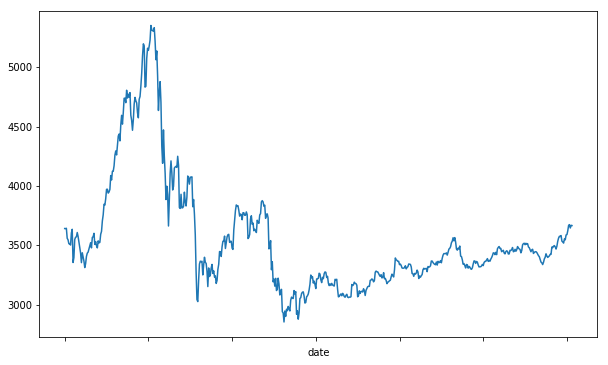

In [7]:
hs300['close'].plot(figsize=(10, 6))

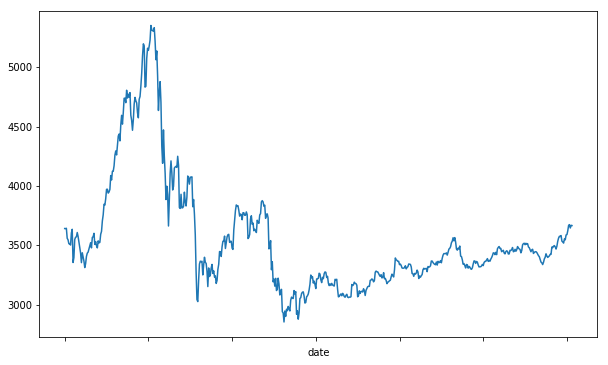

In [8]:
hs300.close.plot(figsize=(10, 6))     #等价；

In [9]:
data = ts.get_k_data('600030') #默认前复权价格；
data.head()

,date,open,close,high,low,volume,code
0,2016-10-10,15.565,15.680,15.718,15.479,717306.0,600030
1,2016-10-11,15.680,15.785,15.842,15.623,781540.0,600030
2,2016-10-12,15.747,15.699,15.775,15.651,337591.0,600030
3,2016-10-13,15.680,15.661,15.747,15.623,386022.0,600030
4,2016-10-14,15.670,15.728,15.747,15.584,430726.0,600030


In [10]:
data2 = ts.get_k_data('600030', autype='hfq') #不复权
data2.head()

,date,open,close,high,low,volume,code
0,2016-10-10,62.193,62.651,62.803,61.849,717306.0,600030
1,2016-10-11,62.651,63.071,63.300,62.422,781540.0,600030
2,2016-10-12,62.918,62.727,63.032,62.536,337591.0,600030
3,2016-10-13,62.651,62.574,62.918,62.422,386022.0,600030
4,2016-10-14,62.612,62.842,62.918,62.269,430726.0,600030


In [11]:
data3 = ts.get_k_data('600030', ktype = '5') #两个日期之间的前复权数据
data3.head()

,date,open,close,high,low,volume,amount,turnoverratio,code
0,2019-05-23 14:55,19.99,20.01,20.04,19.98,22271.0,{},2.2692,600030
1,2019-05-23 15:00,20.01,20.05,20.05,20.01,12499.0,{},1.2735,600030
2,2019-05-24 09:35,20.10,20.18,20.23,20.05,64239.0,{},6.5452,600030
3,2019-05-24 09:40,20.18,20.19,20.21,20.13,40776.0,{},4.1546,600030
4,2019-05-24 09:45,20.19,20.16,20.21,20.16,28675.0,{},2.9216,600030


In [12]:
data = ts.get_k_data(['600030','000001'])    #tushare API接口不支持多股票数据；
data

""


#### Tushare获得历史逐笔交易数据

In [13]:
df = ts.get_tick_data('600030',date='2017-07-28')    #get_tick_data()
df.sort_index(inplace = True, ascending = False)
df.head(10)

AttributeError: 'NoneType' object has no attribute 'sort_index'

#### Tushare获得当前主流指数列表

In [ ]:
df = ts.get_index()
df.head()   #显示部分主流指数

#### Tushare获得股票的基本面信息

In [ ]:
df = ts.get_stock_basics()         #基本面数据
date = df.ix['600848']['timeToMarket']
date

In [ ]:
date = df.loc['600030']['timeToMarket']        #ix即将要被取消；
date

#### 获得所有股票基本面数据

In [ ]:
data = ts.get_stock_basics()     #get_stocl_basics()
data.head()

In [ ]:
data.info()

In [ ]:
data.ix['600030'][['pe','esp']]     #pandas数据选择的复习；

In [ ]:
data.loc['600030'][['pe','esp']]

In [ ]:
data = ts.get_profit_data(2017,1)    #获得公司盈利数据；

In [ ]:
data.head()

In [ ]:
data.set_index('code', inplace = True)

In [ ]:
data.head()

In [ ]:
data.ix['600030'][['roe','net_profit_ratio']]

#### 获得非结构化新闻、舆情数据

In [ ]:
ts.get_latest_news(top=5,show_content=True) #显示最新5条新闻，并打印出新闻内容

#### 获取龙虎榜信息

In [ ]:
top_list = ts.top_list('2017-08-11')
top_list.head()

### 2.4 常用：优矿

可以通过优矿下载数据，并保存成CSV文件下载再导入；

In [ ]:
# 获得某一只当天的tick数据；
data=DataAPI.MktTickRTIntraDayGet(securityID=u"000001.XSHE",startTime=u"09:30",endTime=u"15:00",field=u"",pandas="1")
data.to_csv('tick_data.csv')   #下载并保存数据以供分析；

In [ ]:
# 获得某一些股票具体某一天的因子数据；
DataAPI.MktStockFactorsOneDayGet(tradeDate=u"20170630",secID=u"",ticker=u"000001,600030",field=u"ticker,ROE,PE,PB",pandas="1")

In [ ]:
#某一只股票一段时间之内的因子数据；
DataAPI.MktStockFactorsDateRangeGet(secID=u"",ticker=u"000001",beginDate=u"20100101",endDate=u"20170616",field=u"tradeDate,ROE,PE,PB",pandas="1")

In [ ]:
# 获取交易日历
start_date = '2014-01-01'
end_date = '2017-07-01'
trading_date = DataAPI.TradeCalGet(exchangeCD=u"XSHG",beginDate=u"",endDate=u"",field=u"",pandas="1")
# trading_date.to_csv('trading_date.csv')
# 筛选2013年到2016年每月最后一个交易日的日期
print(trading_date)
month_end = trading_date[(trading_date['isMonthEnd']==1) & (trading_date['calendarDate']>start_date) & (trading_date['calendarDate']<end_date)]['calendarDate'].tolist()
print month_end

In [ ]:
# 获取某个日期以前上市的，正常交易或暂停交易的股票代码，格式为xxxxxx.XSHE或xxxxxx.XSHG
date = '2017-10-01'
stock_basics = DataAPI.EquGet(equTypeCD=u"A",secID=u"",ticker=u"",listStatusCD=u"",field=u"",pandas="1")
# stock_basics.to_csv('data/stock_basics.csv', encoding='GB18030')
valid_stocks = stock_basics.loc[(stock_basics['listDate']<date) & (stock_basics['listStatusCD'].isin(['L','S']))]['secID']
# valid_stocks.to_csv('data/valid_stocks.csv', encoding='GB18030')
print valid_stocks

In [ ]:
# 获取对应股票在对应日期的多个因子值
import pandas as pd

mkt_value = [DataAPI.MktStockFactorsOneDayGet(tradeDate=date,secID=valid_stocks,ticker=u"",field=["secID", 'LCAP','PE', 'REVS20', 'tradeDate'],pandas="1").set_index(['tradeDate', 'secID']) for date in month_end]
lcap = pd.concat(mkt_value, axis=0)
# lcap.to_csv('data/raw_factors.csv')
print lcap.head(5)

In [ ]:
# 每个月最后一个交易日计算市值最小的20只股票
import pandas as pd

min_cap_pool = {date: lcap['LCAP'][date].sort_values(ascending=True).index[:20] for date in month_end}
min_cap_pool = pd.DataFrame(min_cap_pool)
print min_cap_pool

## 3. 数据存储

HDF5

Hierarchical Data Format(HDF)是一种针对大量数据进行组织和存储的文件格式。

经历了20多年的发展，HDF格式的最新版本是HDF5

In [22]:
import numpy as np
import pandas as pd
import tushare as ts

In [23]:
%time data = np.random.randn(500000,10)

Wall time: 304 ms


In [24]:
data.shape

(500000, 10)

In [25]:
data = pd.DataFrame(data)

In [26]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,2.386067,-0.254622,0.130420,-0.241325,-1.488019,-1.836847,-1.311110,0.725937,1.249995,0.781971
1,0.183811,1.513753,0.872931,-0.486893,1.172449,1.069957,-1.479120,-0.040270,-0.220112,-0.843574
2,0.884520,-1.307929,0.476709,1.247367,-0.245793,0.666674,-0.739754,-0.197210,0.435242,-0.859887
3,-0.790487,-1.551270,0.399693,0.067506,-1.039020,1.698144,0.448952,-0.278088,1.295625,0.512486
4,-0.489582,-0.454216,-0.515507,2.508829,0.519723,0.232606,1.219748,1.459025,-0.151214,1.433428


In [27]:
hdf5 = pd.HDFStore('data/random_number.h5', 'w')        #pd.HDFStore(),'w':write模式；知识生成了HDF5对象/文件；

OSError: ``data`` does not exist

In [28]:
hdf5.      #tab

SyntaxError: invalid syntax (<ipython-input-28-b99f4f33961f>, line 1)

In [11]:
hdf5.open()       #打开刚刚创建的HDF5的文件；

In [12]:
hdf5['data'] = data      #设置主键的名字，名字叫做data；把data随机数数据已经存进HDF5文件；

In [13]:
hdf5.close()

In [14]:
hdf5 = pd.HDFStore('data/random_number.h5', 'r')      #'r'读取模式；

In [15]:
data_read = hdf5['data']     #读取hdf5中的数据并赋值给data_read

In [16]:
data_read.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.205942,-0.280256,-1.671727,0.364285,-0.488249,-0.060461,1.861852,0.744359,0.818997,0.458245
1,-0.801891,0.102070,1.293319,1.254277,1.067564,0.261026,-1.077104,-0.274136,0.190381,-0.441855
2,0.236176,0.521590,1.321235,0.920120,-0.474281,0.037810,-0.636843,0.017675,0.768869,2.340724
3,-1.037212,-1.046202,1.970948,0.894232,-0.475212,2.401837,-0.893403,0.426868,-0.896778,-0.355959
4,1.148933,1.075020,-1.818066,1.162867,1.581717,0.681554,-0.607851,2.105613,1.508517,0.488335


In [17]:
hdf5.close()

In [20]:
profit_data = ts.get_profit_data(2017,1)

[Getting data:]#######################################################

In [21]:
profit_data.head()

,code,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
0,600423,*ST柳化,215.12,10.30,-1.3970,40.6863,0.1018,394.6887,0.9883
1,600306,商业城,71.97,71.48,17.3030,171.9346,0.9651,240.5080,1.3501
2,000717,韶钢松山,26.83,3.19,6.2247,168.1588,0.0695,5268.7636,2.1776
3,600133,东湖高新,26.81,55.22,11.6396,686.8356,1.0828,1243.7266,1.9609
4,600354,敦煌种业,23.40,302.21,25.0654,273.7035,0.5185,90.5655,0.1715


In [22]:
profit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3289 entries, 0 to 3288
Data columns (total 9 columns):
code                 3289 non-null object
name                 3289 non-null object
roe                  3281 non-null float64
net_profit_ratio     3284 non-null float64
gross_profit_rate    3284 non-null float64
net_profits          3288 non-null float64
eps                  3288 non-null float64
business_income      3288 non-null float64
bips                 3288 non-null float64
dtypes: float64(7), object(2)
memory usage: 231.3+ KB


In [23]:
hdf5 = pd.HDFStore('profit_data.h5', 'w')

In [24]:
hdf5['data'] = profit_data     #把刚刚从tushare上调取的利润数据存进HDF5文件里；

In [25]:
hdf5.close()

In [27]:
hdf5 = pd.HDFStore('profit_data.h5', 'r')

In [28]:
data_profit = hdf5['data']

In [29]:
data_profit.head(5)

,code,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
0,600423,*ST柳化,215.12,10.30,-1.3970,40.6863,0.1018,394.6887,0.9883
1,600306,商业城,71.97,71.48,17.3030,171.9346,0.9651,240.5080,1.3501
2,000717,韶钢松山,26.83,3.19,6.2247,168.1588,0.0695,5268.7636,2.1776
3,600133,东湖高新,26.81,55.22,11.6396,686.8356,1.0828,1243.7266,1.9609
4,600354,敦煌种业,23.40,302.21,25.0654,273.7035,0.5185,90.5655,0.1715


In [30]:
data_profit[data_profit['roe']>15].head()

,code,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
0,600423,*ST柳化,215.12,10.30,-1.3970,40.6863,0.1018,394.6887,0.9883
1,600306,商业城,71.97,71.48,17.3030,171.9346,0.9651,240.5080,1.3501
2,000717,韶钢松山,26.83,3.19,6.2247,168.1588,0.0695,5268.7636,2.1776
3,600133,东湖高新,26.81,55.22,11.6396,686.8356,1.0828,1243.7266,1.9609
4,600354,敦煌种业,23.40,302.21,25.0654,273.7035,0.5185,90.5655,0.1715


In [31]:
data_profit[(data_profit['roe']>15) & (data_profit['net_profit_ratio']>20)]      #数据库调取数据并进行多条件选股；


,code,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
1,600306,商业城,71.97,71.48,17.3030,171.9346,0.9651,240.5080,1.3501
3,600133,东湖高新,26.81,55.22,11.6396,686.8356,1.0828,1243.7266,1.9609
4,600354,敦煌种业,23.40,302.21,25.0654,273.7035,0.5185,90.5655,0.1715
5,600225,*ST松江,22.84,146.43,24.9719,423.3024,0.4524,289.0652,0.3089
6,600230,沧州大化,21.94,39.66,55.6318,424.8125,1.4440,1070.9230,3.6402
7,600338,西藏珠峰,20.28,53.09,70.4140,305.8753,0.4684,576.0689,0.8821
8,000036,华联控股,18.32,42.51,71.4131,758.4114,0.6643,1783.7509,1.5625
9,300288,朗玛信息,18.30,85.96,26.9264,240.8041,0.7125,280.1342,0.8289
10,600291,西水股份,17.53,22.32,26.3018,2117.8868,1.9375,9488.7197,8.6808
13,600633,浙数文化,16.31,192.98,43.5107,1259.7513,0.9676,652.7781,0.5013


声明：本资料仅限内部研究使用，切勿外传。